In [1]:
# Cell 1: Load Data from All Scenarios

import os
import pandas as pd

# Print current working directory for confirmation
print("Current Working Directory:", os.getcwd())

# Adjust this path if needed; here it is based on your project structure.
data_dir = os.path.join("..", "src", "synthetic_data", "data", "processed")

# Define the list of scenario filenames
scenarios = ['baseline', 'disruption', 'high_demand', 'sustainability']
df_list = []

for scenario in scenarios:
    file_name = f"synthetic_logistics_data_{scenario}.csv"
    file_path = os.path.join(data_dir, file_name)
    try:
        temp_df = pd.read_csv(file_path)
        # Ensure the scenario label is present
        temp_df['scenario'] = scenario
        df_list.append(temp_df)
        print(f"Successfully loaded {file_name}")
    except FileNotFoundError:
        print(f"File not found: {file_path}. Please verify your directory structure.")

# Combine data from all scenarios
if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print("Combined Data Shape:", df.shape)
    display(df.head())
else:
    print("No data loaded. Please verify the CSV file paths.")


Current Working Directory: /Users/mortezapourjahangiri/PycharmProjects/PythonProject/VAE_GAN_Logistics_Framework/notebooks
Successfully loaded synthetic_logistics_data_baseline.csv
Successfully loaded synthetic_logistics_data_disruption.csv
Successfully loaded synthetic_logistics_data_high_demand.csv
Successfully loaded synthetic_logistics_data_sustainability.csv
Combined Data Shape: (344250, 33)


,shipment_id,timestamp,day_of_week,hour_of_day,origin,lat_origin,lon_origin,destination,lat_destination,lon_destination,...,airport_origin,airport_destination,weather_condition,weather_severity,traffic_congestion,port_congestion,disruption_indicator,capacity_modifier,scenario,multi_leg
0,1,2025-05-05 12:25:23,Monday,12,Barcelona,41.3851,2.1734,Lisbon,38.7223,-9.1393,...,NaN,NaN,clear,0.0,NaN,1.280286,0,1.019732,baseline,True
1,2,2025-05-05 12:25:23,Monday,12,Lisbon,38.7223,-9.1393,Rotterdam,51.9244,4.4777,...,NaN,NaN,clear,0.0,NaN,1.280286,0,1.019732,baseline,False
2,3,2025-05-05 12:25:23,Monday,12,Rotterdam,51.9244,4.4777,Lisbon,38.7223,-9.1393,...,Rotterdam The Hague Airport,Lisbon Humberto Delgado Airport,clear,0.0,NaN,NaN,0,1.019732,baseline,False
3,4,2025-05-05 12:25:23,Monday,12,Lisbon,38.7223,-9.1393,Barcelona,41.3851,2.1734,...,Lisbon Humberto Delgado Airport,Barcelona-El Prat Airport,clear,0.0,NaN,NaN,1,1.019732,baseline,False
4,5,2025-05-05 12:25:23,Monday,12,Rotterdam,51.9244,4.4777,Lisbon,38.7223,-9.1393,...,Rotterdam The Hague Airport,Lisbon Humberto Delgado Airport,clear,0.0,NaN,NaN,0,1.019732,baseline,False


In [2]:
# Cell 2: Data Cleaning - Convert timestamp, check data types, and save cleaned data

import os
import pandas as pd

# Convert "timestamp" column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Display data types to ensure that conversion was successful
print("Data Types:")
print(df.dtypes)

# (Optional) Additional data cleaning steps can be inserted here as needed.
# For example, handling missing values, renaming columns, etc.

# Define the path where the cleaned data will be saved.
# Adjust the relative path if necessary to match your project directory structure.
cleaned_file_path = os.path.join("..", "src", "synthetic_data", "data", "processed", "synthetic_logistics_data_cleaned.csv")

# Save the cleaned DataFrame to a CSV file for later use (e.g., in the VAE‑GAN training)
df.to_csv(cleaned_file_path, index=False)
print("Cleaned data has been saved to:", os.path.abspath(cleaned_file_path))


Data Types:
shipment_id                      int64
timestamp               datetime64[ns]
day_of_week                     object
hour_of_day                      int64
origin                          object
lat_origin                     float64
lon_origin                     float64
destination                     object
lat_destination                float64
lon_destination                float64
intermediate                    object
lat_intermediate               float64
lon_intermediate               float64
transport_mode                  object
route                           object
distance                         int64
volume                         float64
transit_time                   float64
cost                           float64
co2_emissions                  float64
carrier                         object
port_origin                     object
port_destination                object
airport_origin                  object
airport_destination             object
weather_condi

In [3]:
# Cell 3: Handle Missing Values

# Make an explicit copy to avoid chained assignment warnings
df = df.copy()

# Replace NaN in categorical columns with "None"
df['intermediate'] = df['intermediate'].fillna("None")
df['port_origin'] = df['port_origin'].fillna("None")
df['port_destination'] = df['port_destination'].fillna("None")
df['airport_origin'] = df['airport_origin'].fillna("None")
df['airport_destination'] = df['airport_destination'].fillna("None")

# Replace NaN in numeric columns with desired defaults
# (e.g., for multi-leg coordinates and congestion multipliers)
df['lat_intermediate'] = df['lat_intermediate'].fillna(0.0)
df['lon_intermediate'] = df['lon_intermediate'].fillna(0.0)
df['traffic_congestion'] = df['traffic_congestion'].fillna(1.0)  # Neutral value
df['port_congestion'] = df['port_congestion'].fillna(1.0)        # Neutral value

# Verify that there are no missing values left
print("Missing values after handling:")
print(df.isna().sum())


Missing values after handling:
shipment_id             0
timestamp               0
day_of_week             0
hour_of_day             0
origin                  0
lat_origin              0
lon_origin              0
destination             0
lat_destination         0
lon_destination         0
intermediate            0
lat_intermediate        0
lon_intermediate        0
transport_mode          0
route                   0
distance                0
volume                  0
transit_time            0
cost                    0
co2_emissions           0
carrier                 0
port_origin             0
port_destination        0
airport_origin          0
airport_destination     0
weather_condition       0
weather_severity        0
traffic_congestion      0
port_congestion         0
disruption_indicator    0
capacity_modifier       0
scenario                0
multi_leg               0
dtype: int64


In [4]:
# Cell 4: Feature Engineering

# Extract additional temporal features from the timestamp column
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month

# Create a new feature: cost per ton-km; ensure the denominator (volume * distance) is nonzero.
df['cost_per_tonkkm'] = df.apply(lambda row: row['cost'] / (row['volume'] * row['distance'])
                                 if row['volume'] * row['distance'] > 0 else None, axis=1)

display(df[['timestamp', 'hour', 'day_of_week', 'month', 'cost_per_tonkkm']].head())


,timestamp,hour,day_of_week,month,cost_per_tonkkm
0,2025-05-05 12:25:23,12,Monday,5,0.063877
1,2025-05-05 12:25:23,12,Monday,5,0.059817
2,2025-05-05 12:25:23,12,Monday,5,0.657908
3,2025-05-05 12:25:23,12,Monday,5,0.812902
4,2025-05-05 12:25:23,12,Monday,5,0.700417


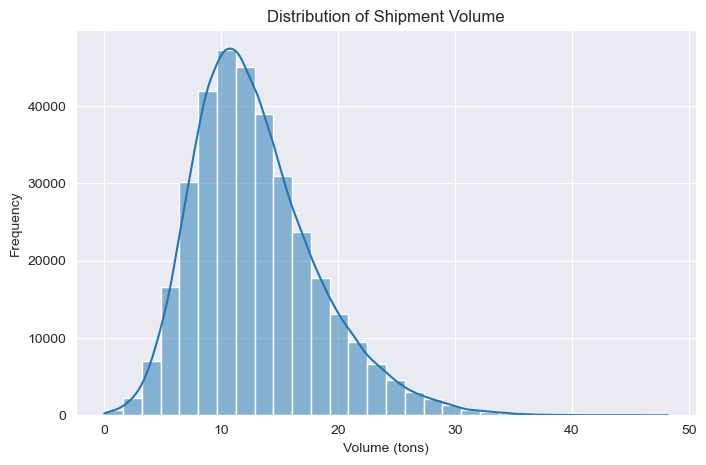

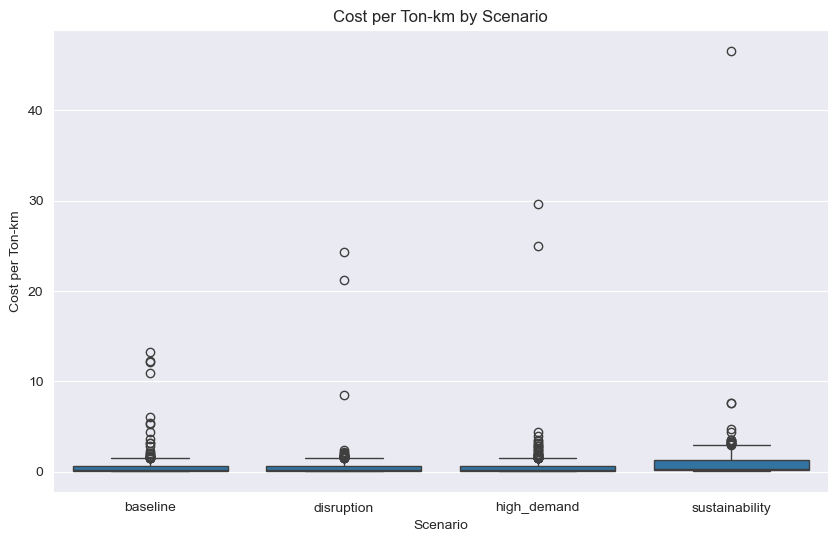

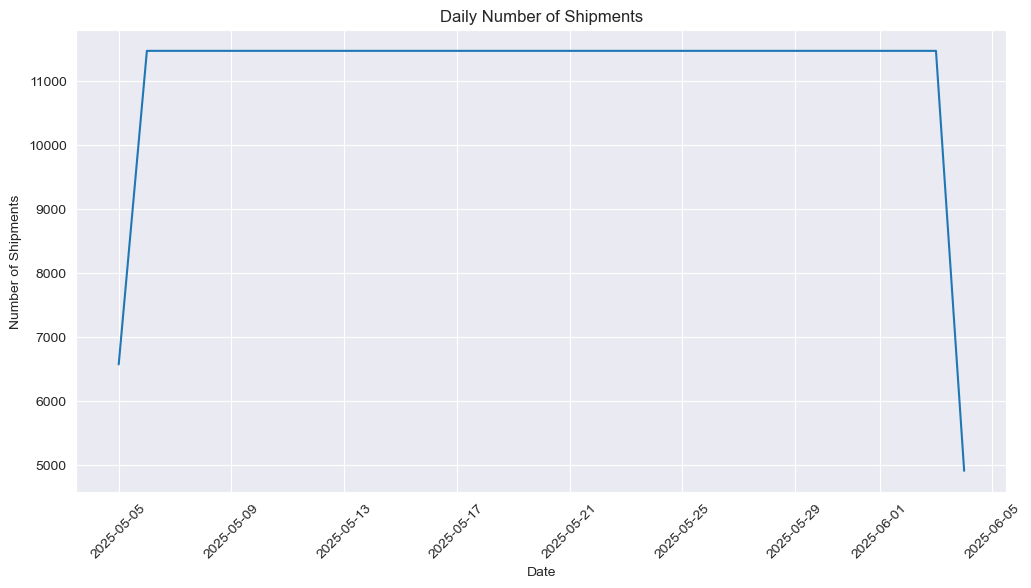

In [5]:
# Cell 5: EDA Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# 5A: Histogram of Shipment Volume
plt.figure(figsize=(8, 5))
sns.histplot(df['volume'], bins=30, kde=True)
plt.title("Distribution of Shipment Volume")
plt.xlabel("Volume (tons)")
plt.ylabel("Frequency")
plt.show()

# 5B: Boxplot: Cost per ton-km by Scenario
plt.figure(figsize=(10, 6))
sns.boxplot(x='scenario', y='cost_per_tonkkm', data=df)
plt.title("Cost per Ton-km by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Cost per Ton-km")
plt.show()

# 5C: Time Series: Daily Number of Shipments
# First, group by date (extracted from timestamp) and count shipments
daily_shipments = df.groupby(df['timestamp'].dt.date)['shipment_id'].count().reset_index()
daily_shipments.columns = ['date', 'num_shipments']

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='num_shipments', data=daily_shipments)
plt.title("Daily Number of Shipments")
plt.xlabel("Date")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.show()


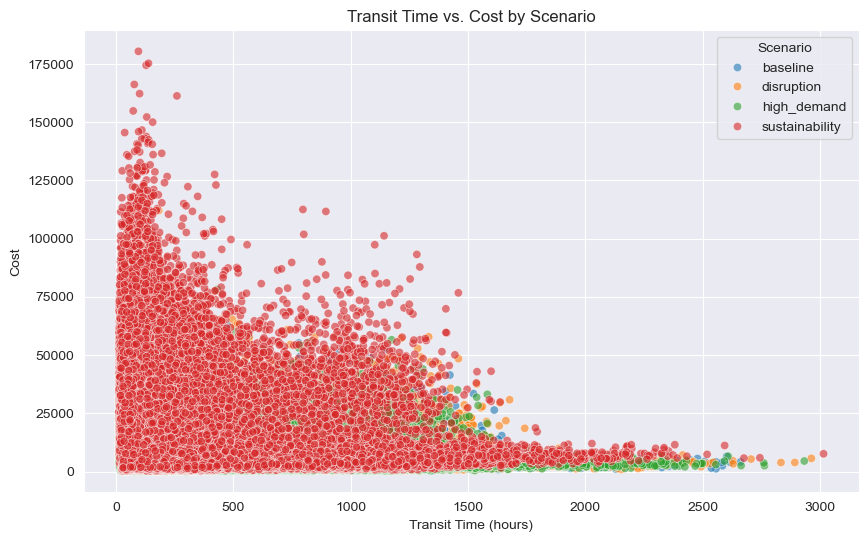

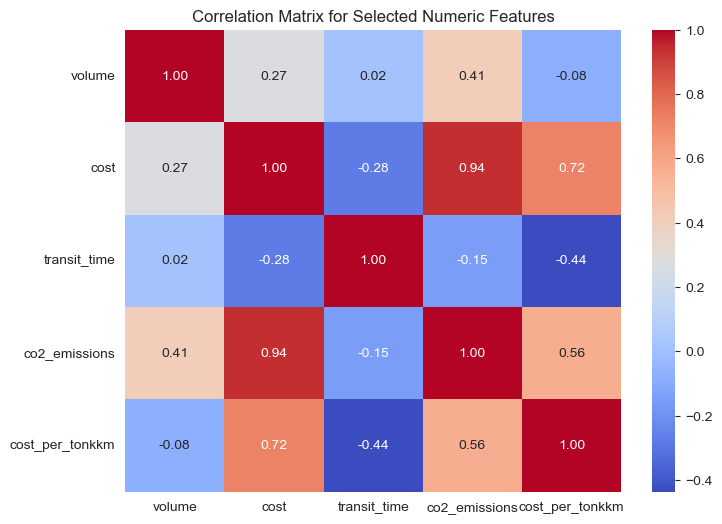

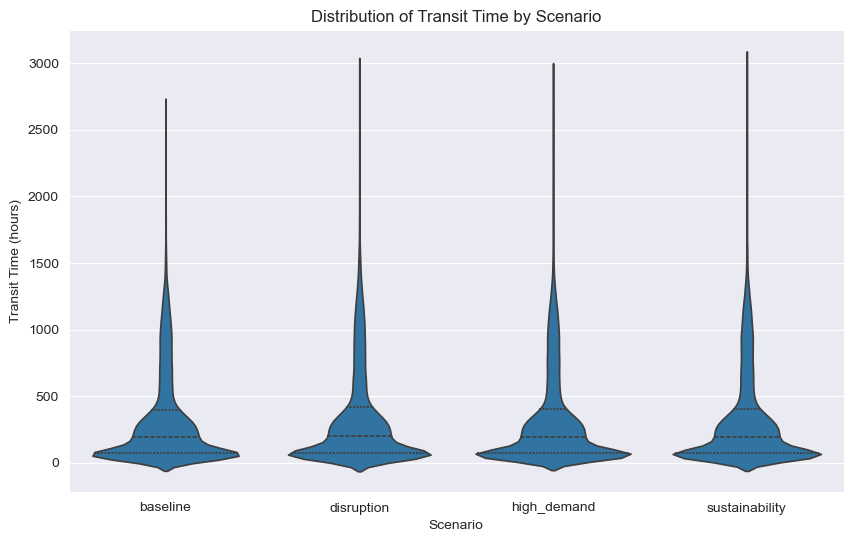

In [6]:
# Cell 7: Additional Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plot: Transit Time vs. Cost (colored by scenario)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='transit_time', y='cost', hue='scenario', alpha=0.6)
plt.title("Transit Time vs. Cost by Scenario")
plt.xlabel("Transit Time (hours)")
plt.ylabel("Cost")
plt.legend(title='Scenario')
plt.show()

# 2. Correlation Matrix Heatmap
# Select a few key numeric columns: volume, cost, transit_time, co2_emissions, and cost_per_tonkkm.
numeric_cols = ['volume', 'cost', 'transit_time', 'co2_emissions', 'cost_per_tonkkm']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Selected Numeric Features")
plt.show()

# 3. Violin Plot: Distribution of Transit Time by Scenario
plt.figure(figsize=(10, 6))
sns.violinplot(x='scenario', y='transit_time', data=df, inner="quartile")
plt.title("Distribution of Transit Time by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Transit Time (hours)")
plt.show()


In [5]:
print(df['scenario'].value_counts())


scenario
high_demand       114750
baseline           76500
disruption         76500
sustainability     76500
Name: count, dtype: int64


In [6]:
df.groupby("scenario")["transit_time"].describe()


,count,mean,std,min,25%,50%,75%,max
scenario,,,,,,,,
baseline,76500.0,317.590926,339.653094,12.018425,73.000054,193.619326,399.806278,2660.793430
disruption,76500.0,332.442087,357.665465,12.012886,76.179753,202.673826,418.904519,2963.268616
high_demand,114750.0,318.845427,342.244606,12.008082,72.103805,194.240847,401.319081,2933.223049
sustainability,76500.0,320.362777,343.322198,12.050769,72.604419,196.283904,402.409821,3015.336062


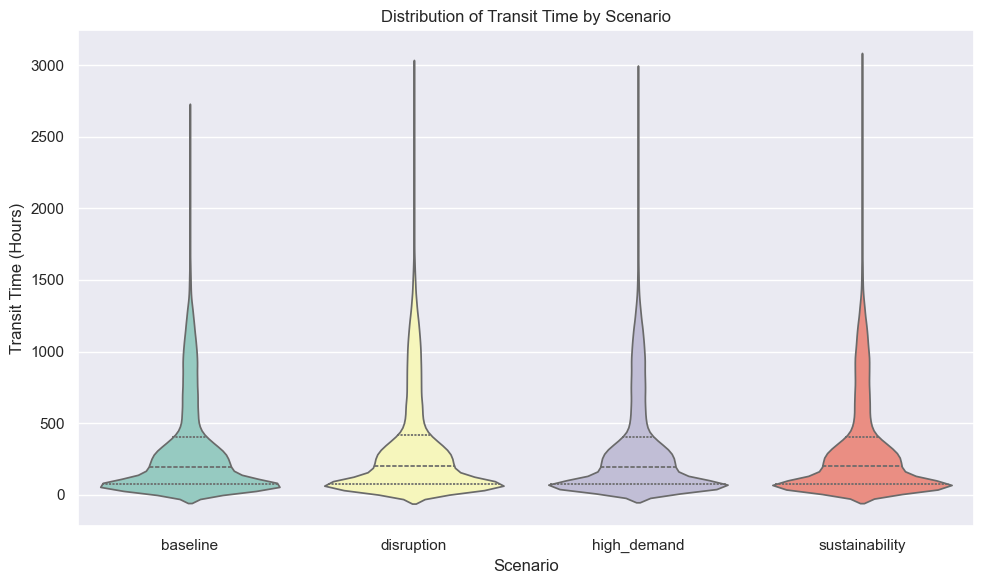

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
df = pd.read_csv("../src/synthetic_data/data/processed/synthetic_logistics_data_cleaned.csv")

# Convert 'scenario' column to string for better control
df['scenario'] = df['scenario'].astype(str)

# Set plot style
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Generate violin plot
sns.violinplot(
    data=df,
    x='scenario',
    y='transit_time',
    hue='scenario',
    palette='Set3',
    density_norm='width',  # Replacement for deprecated scale='width'
    inner='quartile',
    legend=False
)

# Label and title
plt.title("Distribution of Transit Time by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Transit Time (Hours)")
plt.tight_layout()

plt.show()
